### Gather

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import requests 
import os
import json

#### Load the datasets into Pandas Dataframes

In [2]:
# load twitter-archive-enhanced.csv into a pandas dataframe
tw_arch_prelim = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# download image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# create the local folder and file and write the downloaded data to the local tsv file
with open(os.path.join(url.split('/')[-1]), mode='wb') as file: 
          file.write(response.content)

In [4]:
# load image_predictions.tsv into a pandas dataframe
img_pred_prelim = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
# this cell is the copied twitter api code. I am a completing this project using the provided tweet_json.txt file.
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tw_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# load the tweet json data into a dataframe
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

In [6]:
tweet_id = []
retweet_count = []
favorite_count = [] 

In [7]:
for i in range(len(tweets)):
    tweet_id.append(tweets[i]['id'])
    retweet_count.append(tweets[i]['retweet_count'])
    favorite_count.append(tweets[i]['favorite_count'])

In [8]:
d = {'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count}
trf_prelim = pd.DataFrame(data=d)

#### Copy the dataframes

In [9]:
tw_arch = tw_arch_prelim.copy()

In [10]:
img_pred = img_pred_prelim.copy()

In [11]:
trf = trf_prelim.copy()

### Assess

#### Visual Assessment

In [12]:
tw_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
dog_names = tw_arch['name'].unique()
dog_names.sort()
dog_names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [14]:
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
trf

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Programmatic Assessment

In [16]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
tw_arch['tweet_id'].nunique()

2356

Comparing the number of unique values to the total number of values in the 'tweet_id' column, we can see there are no duplicate tweet id numbers

In [18]:
tw_arch['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

Looking at all the unique values in 'source', we can see that this column is not providing any especially useful information that we might analyze, so we will drop the column.

In [19]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
# I want to look a little closer at the values in 'timestamp' in tw_arch
timezones = tw_arch['timestamp'].str[-5:]

In [22]:
len(timezones)

2356

In [23]:
timezones.unique()

array(['+0000'], dtype=object)

After programmatically assesing the 'timezone' column in tw_arch, we can see that every value in the column ends in '+0000', so this is useless information and can be removed.

#### Data Quality Issues
1. **Incorrect type:** Incorrect datatypes in the tw_arch dataset.
2. **Incorrect type:** Incorrect datatypes in the img_pred dataset.
3. **Incorrect type:** Incorrect datatypes in the trf dataset.
4. **Validity:** rating_numerator was not programmatically extracted properly.
5. **Validity:** some of the rows in img_pred do not have a dog prediction in p1, p2, or p3.
6. **Unnecessary Information:** Time values in 'timestamp' are already in a 24 hour format, and all timezone offsets are '+0000'. This is unnecessary information.
7. **Validity:** some of the tweets in tw_arch are retweets.
8. **Consistency:** the null values in 'name' in tw_arch are represented by the string 'None' (so they aren't recognized as null), while the null values in several other are represented as NaN, a true null value.
9. **Incorrect type:** 'Rating_numerator' and 'rating_denominator are two parts of a fraction, which should be expressed as a float, not an integer. 

#### Data Tidiness Issues
1. **Each variable forms a column:** The columns 'doggo', 'floofer', 'pupper', and 'puppo' are function like dummy variables for what is really a single variable. This variable should be captured in a a single column with the values doggo, floofer, pupper, puppo, or none.
2. **Every observational unit forms a table:** 'in_reply_to_status_id' in tw_arch, 'in_reply_to_user_id', 'retweeted_status_id' in tw_arch, 'retweeted_status_user_id', and 'retweeted_status_timestamp' don't contain information
3. **Every observation forms a row:** img_pred only has 2075 rows, while tw_arch has 2356 rows and trf has 2354. When we join these dataframes together, a few hundred rows will have missing values.
4. **Every observational unit forms a table:** the three separate datasets, but they need to be a single dataset.

### Clean

#### Define

The cleaning definitions below correspond to the issues identified above itemized with the corresponding number.

**Quality Issues**  
1. Convert 'tweet_id' to string format in all three dataframes.
2. Convert 'timestamp' to datetime data type.
3. Manually extract rating numerator from 'text' and store it as a float.
4. Drop rows in img_pred with 'p1_dog' = False AND 'p2_dog' = False AND 'p3_dog' = False 
5. Remove '+0000' from each 'timestamp' value
6. Drop tweets from tw_arch that are retweets
7. Drop the columns with all null values and replace missing values in other columns with 'none'
8. Convert rating_numerator and rating_denominator to floats and combine them into a single column.

**Tidiness Issues**
1. Create a single column to capture the dog stages of 'doggo', 'floofer', 'pupper', 'puppo', or 'none'.
2. Drop rows in the joined dataframe that have null values, since we only want to keep rows that have original ratings and images.
3. Merge the datasets into a single dataframe.

#### Code

Quality Issues

In [24]:
# Issue 1: convert 'tweet_id' to string in all three dataframes
tw_arch['tweet_id'] = tw_arch['tweet_id'].astype(str)
img_pred['tweet_id'] = img_pred['tweet_id'].astype(str)
trf['tweet_id'] = trf['tweet_id'].astype(str)

In [25]:
# Issues 2 and 5: convert tw_arch['timestamp'] to datetime and remove '+0000' from each row
tw_arch['timestamp'] = pd.to_datetime(tw_arch['timestamp'])

In [26]:
# Issue 3: manually extract 'rating_numerator' from 'text' and store it as a float
import re

In [27]:
updated_numerators = tw_arch['text'].str.extractall((r"(\d+\.\d*\/\d+)")).xs(0, level='match')

In [28]:
numerators = updated_numerators[0].str[:-3]

In [29]:
tw_arch['rating_numerator'].update(numerators)

In [30]:
# check for success 
tw_arch.iloc[45]['rating_numerator']

'13.5'

In [31]:
# Issue 4: Keep only rows in img_pred where at least one of 'p1_dog', 'p2_dog', or 'p3_dog' == True 
img_pred = img_pred[(img_pred['p1_dog']==True) | (img_pred['p2_dog']==True) | (img_pred['p3_dog'] ==True)] 

In [32]:
# Issue 6 - drop the retweets from tw_arch
retweets = tw_arch[tw_arch['text'].str.contains("RT @")]
len(retweets)

181

In [33]:
tw_arch.drop(retweets.index, inplace=True)

In [34]:
len(tw_arch)

2175

In [35]:
# Issue 7: Drop the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
# 'retweeted_status_user_id', and 'retweeted_status_timestamp' from tw_arch.
tw_arch.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True);

In [36]:
# Issue 8: Combine rating numerator and denominator into a single column and drop the original columns
tw_arch['rating_numerator'] = tw_arch['rating_numerator'].astype(float)
tw_arch['rating_denominator'] = tw_arch['rating_denominator'].astype(float)
tw_arch['rating'] = tw_arch['rating_numerator']/tw_arch['rating_denominator']

In [37]:
tw_arch.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

Tidness Issues

In [38]:
# Issue 1: Create a single series to capture the dog stages of 'doggo', 'floofer', 'pupper', 'puppo', or 'none'.
# first - replace 'none' values with an empty string
tw_arch['doggo'] = tw_arch['doggo'].str.replace('None','')
tw_arch['floofer'] = tw_arch['floofer'].str.replace('None','')
tw_arch['pupper'] = tw_arch['pupper'].str.replace('None','')
tw_arch['puppo'] = tw_arch['puppo'].str.replace('None','')

In [39]:
# create a new series and fill it with the concatenation of the four columns
stage = tw_arch['doggo'] + tw_arch['floofer'] + tw_arch['pupper'] + tw_arch['puppo']

In [40]:
# get the unique values in 'stage'
stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [41]:
# replace the new concatenated series with the appropriate  value for each row
replace_map = {'doggo':'doggo', 'floofer':'floofer', 'pupper':'pupper', 'puppo':'puppo', '':'None', 'doggopuppo':'doggo, puppo', 'doggofloofer':'doggo, floofer', 'doggopupper':'doggo, pupper'}
stage_fixed = stage.map(replace_map)

In [42]:
# check the new unique values of 'stage_fixed'
stage_fixed.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [43]:
# add a 'stage' column to tw_arch
tw_arch['stage'] = stage_fixed
# drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns
tw_arch.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

In [44]:
# Issue 2: Combine the three dataframes into a single data frame, use inner join below to any include rows in new dataframe with values in every row
from functools import reduce 
dfs = [tw_arch, img_pred, trf]
df_clean = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

#### Test

In [45]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
4,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,1.3,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562


In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 21 columns):
tweet_id          1686 non-null object
timestamp         1686 non-null datetime64[ns]
source            1686 non-null object
text              1686 non-null object
expanded_urls     1686 non-null object
name              1686 non-null object
rating            1686 non-null float64
stage             1686 non-null object
jpg_url           1686 non-null object
img_num           1686 non-null int64
p1                1686 non-null object
p1_conf           1686 non-null float64
p1_dog            1686 non-null bool
p2                1686 non-null object
p2_conf           1686 non-null float64
p2_dog            1686 non-null bool
p3                1686 non-null object
p3_conf           1686 non-null float64
p3_dog            1686 non-null bool
retweet_count     1686 non-null int64
favorite_count    1686 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(10)
me

We can see that df_clean is the result of an inner join, so it only has rows that also had image results in the image prediction dataset.

### Store

#### Save cleaned data to a csv file

In [47]:
df_clean.to_csv('twitter_archive_master.csv', index_label=False)

### Analyze

In [48]:
# create a variable for 'p1' grouped by breed where 'p1' is a dog breed
breeds = df_clean.query('p1_dog == True').groupby(by='p1')
# get the number of unique dog breeds
len(breeds)

111

Which dog breeds receive the highest rating on average?

In [49]:
ratings = breeds.rating.mean().sort_values(ascending=False)
ratings[:5]

p1
Saluki                1.250000
briard                1.233333
Tibetan_mastiff       1.225000
Border_terrier        1.214286
standard_schnauzer    1.200000
Name: rating, dtype: float64

Which dog breeds have received the most retweets on average?

In [50]:
retweets = breeds.retweet_count.mean().sort_values(ascending=False)
retweets[:5]

p1
standard_poodle     6631.857143
Afghan_hound        5976.000000
English_springer    5973.555556
Saluki              5133.750000
Eskimo_dog          4768.888889
Name: retweet_count, dtype: float64

Which dog breeds have received the most favorites on average?

In [51]:
favorites = breeds.favorite_count.mean().sort_values(ascending=False)
favorites [:5]

p1
Saluki                     24060.000000
French_bulldog             17913.000000
Afghan_hound               17326.666667
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
Name: favorite_count, dtype: float64

### Visualize

Average Rating vs. Average Favorite Count

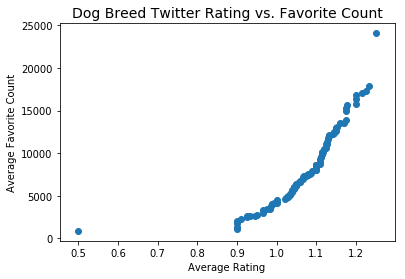

In [55]:
plt.scatter(ratings,favorites)
plt.title('Dog Breed Twitter Rating vs. Favorite Count', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('Average Favorite Count')
plt.savefig('rating_vs_favorite.png');

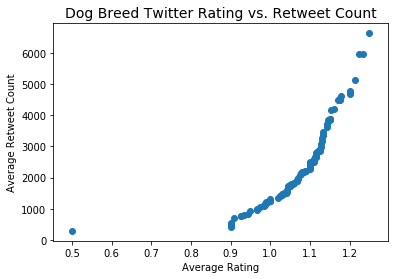

In [56]:
plt.scatter(ratings,retweets)
plt.title('Dog Breed Twitter Rating vs. Retweet Count', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('Average Retweet Count')
plt.savefig('rating_vs_retweet.png');

### Resources 
* https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ 
* https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html 
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
* https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html 
* https://stackoverflow.com/questions/37417090/pandas-slicing-every-row-item-of-a-column
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html
* https://searchdatamanagement.techtarget.com/definition/data-quality 
* https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html 
* https://stackoverflow.com/questions/22100130/pandas-replace-multiple-values-one-column
* https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html 
* https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html 
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html 
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter
* https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
* http://pbpython.com/pandas_dtypes.html 
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html#pandas.to_datetime
* https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.str.islower.html
* https://docs.python.org/2/library/string.html
* https://www.coursera.org/lecture/python-text-mining/demonstration-regex-with-pandas-and-named-groups-wh4nJ 
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.update.html 
* https://github.com/pandas-dev/pandas/pull/4180
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extractall.html#pandas.Series.str.extractall
* https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression